#### 지도학습 \ 분류(Classification) - 붓꽃의 품종

##### 지도학습 유형 중 분류 문제를 살펴본다. 붓꽃 데이터셋을 학습하여 품종을 판별하는 모델을 만든다.
> ###### http://archive.ics.uci.edu/dataset/53/iris

##### 데이터 로딩

In [1]:
# 라이브러리 환경
import pandas as pd
import numpy as np

In [2]:
# sklearn 데이터셋에서 iris 데이터셋 로딩딩
from sklearn import datasets
iris = datasets.load_iris()

# iris 데이터셋은 딕셔너리 형태이므로, key 값 확인
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# DESCR 키를 이용하여 데이터셋 설명(Description) 출력
print(iris['DESCR'])    
# 4개의 피처(설명 변수)에는 꽃받침(sepal)과 꽃잎(petal)에 대한 각각의 가로, 세로길이 값이 들어 있다.
# 분류 대상이 되는 목표 레이블은 3가지 범주(클래스)에 속하는 붓꽃 품종을 나타낸다. 
# 이 3가지 품종 중에서 하나를 선택하는 다중 분류(multi classification) 문제이다.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
# target 속성의 데이터셋 크기
print("데이터셋 크기:", iris["target"].shape)

# target 속성의 데이터셋 내용
print("데이터셋 내용:\n", iris["target"])   # 클래스 0, 1, 2 각각 50개씩 들어 있다.

데이터셋 크기: (150,)
데이터셋 내용:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# data 속성의 데이터셋 크기
print("데이터셋 크기:", iris['data'].shape)

# data 속성의 데이터셋 내용(첫 7개 행 추출)
print("데이터셋 내용:\n", iris['data'][:7, :])

데이터셋 크기: (150, 4)
데이터셋 내용:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]


In [6]:
# data 속성을 판다스 데이터프레임으로 변환
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])  # iris['data']는 넘파이 배열이므로, 판다스 데이터프레임으로 변환/
                                                                # 각 시리즈가 column이 되어 데이터프레임을 구성하고 각각에 이름 부여
print("데이터프레임의 형태:", df.shape)
df.head()

데이터프레임의 형태: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']  # columns 이름 변경
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [8]:
# Target 열 추가
df['Target'] = iris['target']
print('데이터셋의 크기:', df.shape)
print(df.head(), '\n', df[145:])

데이터셋의 크기: (150, 5)
   sepal_length  sepal_width  petal_length  petal_width  Target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0 
      sepal_length  sepal_width  petal_length  petal_width  Target
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2


##### 데이터 탐색

In [9]:
# 데이터프레임의 기본 정보
df.info()       # non-null: 결측값이 아닌

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
# 통계 정보 요약
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
# 결측값 확인인
df.isnull().sum()   # 결측값 확인   / sum 메소드가 True를 1로 인식하여 결측값의 개수를 세어준다.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Target          0
dtype: int64

In [12]:
# 중복 데이터 확인
df.duplicated().sum()   # np.int64(1)   / 1개의 행이 그 전에 있는 행과 중복된 상태이다.

np.int64(1)

In [13]:
# 중복 데이터 출력
df.loc[df.duplicated(), :]  # loc 인덱서의 행 위치에  중복 데이터인지 여부를 표시하는 부울(bool) 값을 입력한다.

,sepal_length,sepal_width,petal_length,petal_width,Target
142,5.8,2.7,5.1,1.9,2


In [14]:
# 중복 데이터 모두 출력
print(df.loc[df.duplicated(keep=False), :])  # keep=False로 설정하면 중복된 모든 행을 출력한다. / by copilot
df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9), :]


     sepal_length  sepal_width  petal_length  petal_width  Target
101           5.8          2.7           5.1          1.9       2
142           5.8          2.7           5.1          1.9       2


,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [15]:
# 중복 데이터 제거거
df = df.drop_duplicates()
df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9), :]

,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2


In [16]:
# 변수 간의 상관 관계 분석
df.corr()   # 상관계수 행렬

,sepal_length,sepal_width,petal_length,petal_width,Target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
Target,0.786971,-0.422987,0.949402,0.956514,1.000000


> ###### 상관계수란 두 변수 사이의 통계적 관계를 나타내기 위해 특정한 상관 관계의 정도를 수치적으로 나타낸 계수이다.

In [17]:
# 시각화 라이브러리 설정
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=0.8) # 폰트 크기 설정

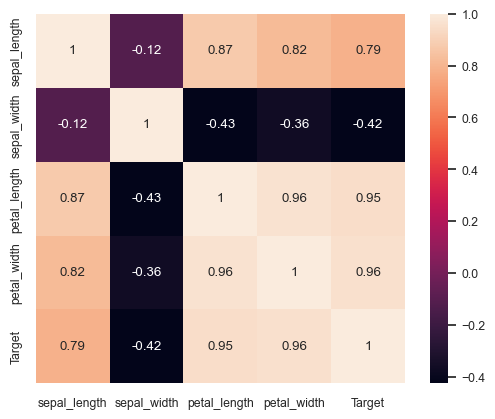

In [18]:
# 상관 계수 히트맵(heatmap)
sns.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
plt.show()  # 상관계수 히트맵을 통해 변수 간의 상관 관계를 시각화한다.  /  annot=True로 설정하면 각 셀에 상관계수 값을 표시한다.

In [19]:
# Target 값의 분포 - value_counts 메소드
print(df['Target'])
df['Target'].value_counts()

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 149, dtype: int64


Target
0    50
1    50
2    49
Name: count, dtype: int64

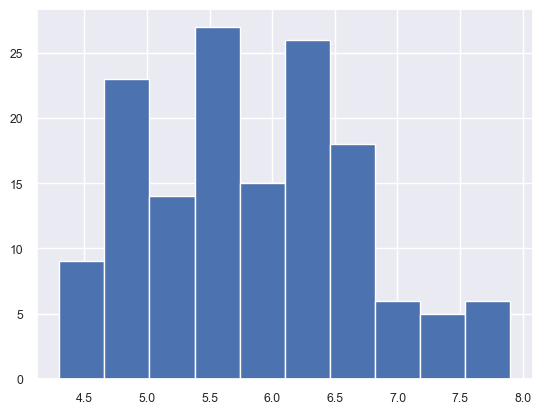

In [20]:
# sepal_length 값의 분포 - hist 함수
plt.hist(x='sepal_length', data=df)
plt.show()

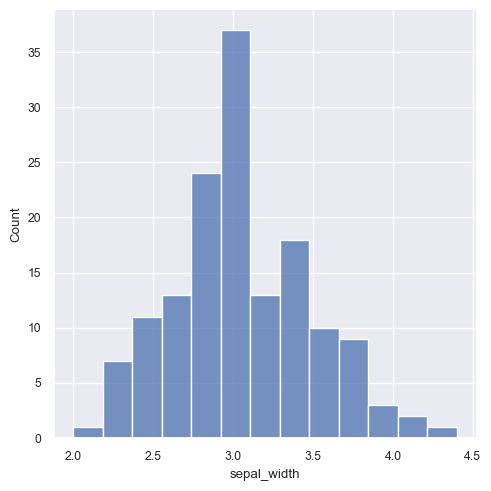

In [21]:
# sepal_width 값의 분포 - displot 함수(histogram)
sns.displot(x='sepal_width', kind='hist', data=df)  # kind='hist'로 설정하여 히스토그램을 그린다.
plt.show()

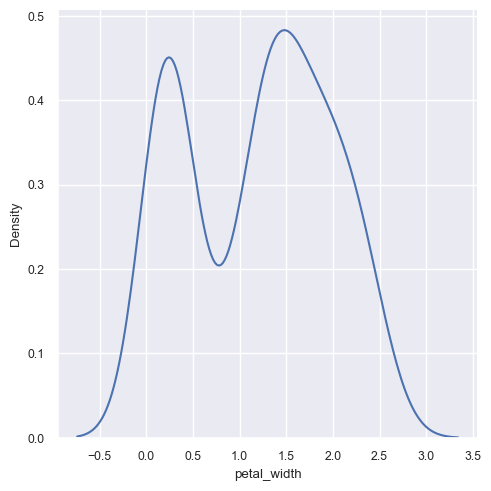

In [22]:
# petal_width 값의 분포 - displot 함수(kde 밀도 함수 그래프)
sns.displot(x='petal_width', kind='kde', data=df)
plt.show()  # 두 개의 봉우리 형태로 분포된 것을 보아 서로 다른 이질적인 데이터가 섞여 있다고 추정해 볼 수 있다.

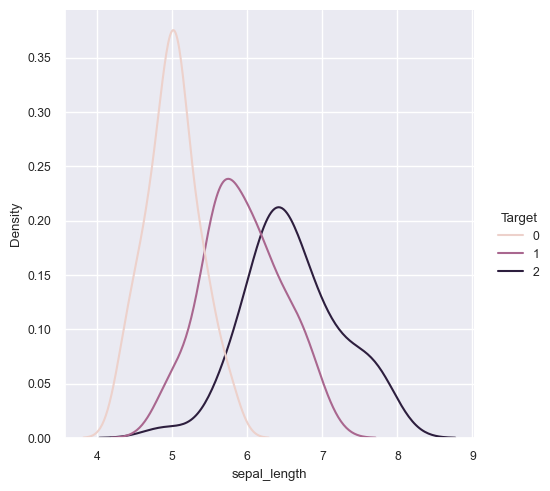

In [23]:
# 품종별 sepal_length 값의 분포 비교
sns.displot(x='sepal_length', hue='Target', kind='kde', data=df)    # hue 옵션으로 목표 변수인 'Target' 열의 품종(클래스)별로 데이터를 구분하여
                                                                    # kde 밀도 함수 그래프를 그린다.
plt.show()  # 제일 눈에 띄는 Setosa 품종(클래스 0)의 그래프를 통해 해당 품종의 꽃받침 길이가 상대적으로 짧다는 것을 알 수 있다. 
            # 따라서 모델 학습에 고려해야 하는 유의미한 피처로 판단된다.

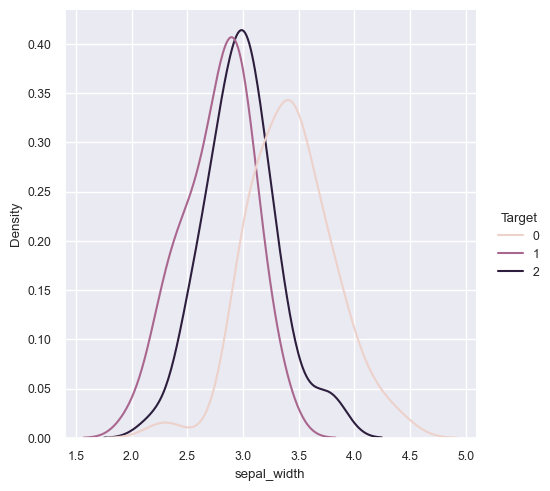

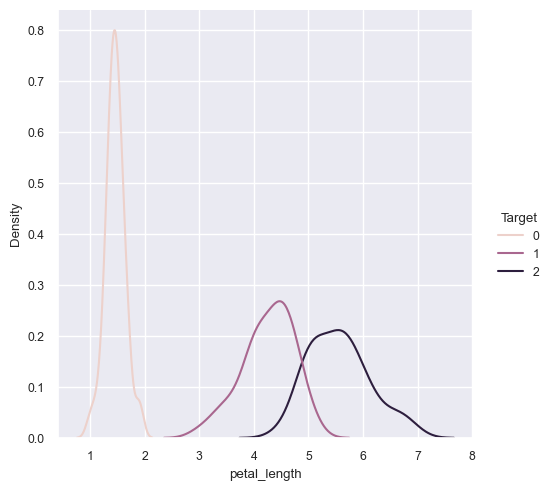

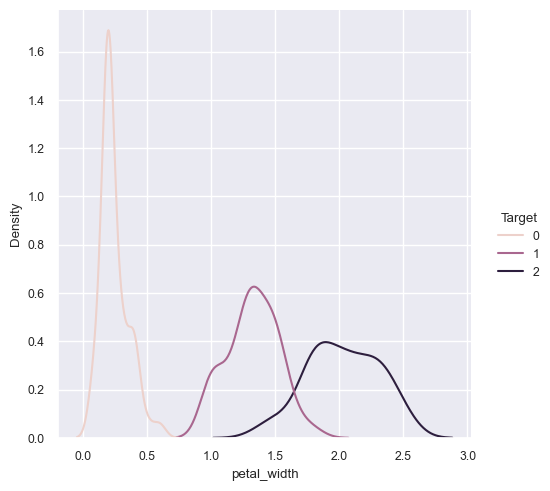

In [24]:
# 나머지 3개 피처 데이터를 한번에 그래프로 출력
for col in ['sepal_width', 'petal_length', 'petal_width']:
    sns.displot(x=col, hue='Target', kind='kde', data=df)
plt.show()

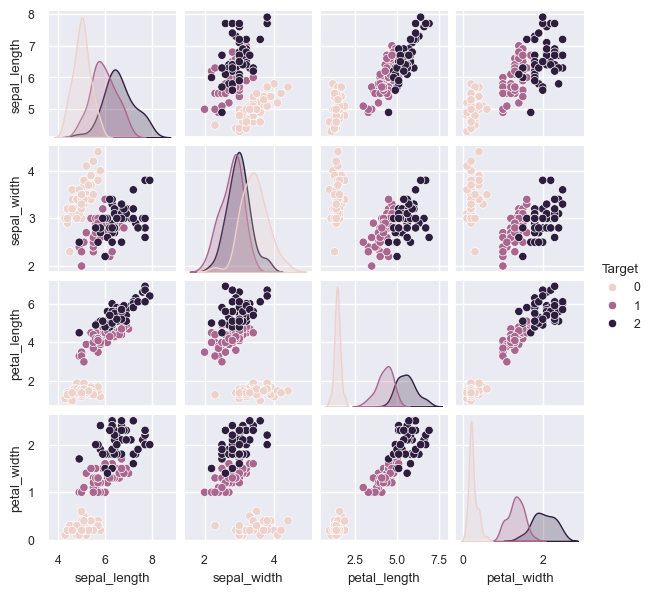

In [25]:
sns.pairplot(df, hue='Target', height=1.5, diag_kind = 'kde') # pairplot 함수로 서로 다른 피처 간 관계를 나타내는 그래프를 한번에 그릴 수 있다.
plt.show()
# 산점도란 두 변수의 관계를 보여주는 시각화 그래프이다. 

##### Train-Test 데이터셋 분할
> ###### 모델 학습에 사용할 훈련(Train) 데이터와 모델 성능을 평가하는데 사용할 테스트 데이터(Test)를 분할한다. <br> 사이킷런 train_test_split 함수를 사용하면 편리하게 나눌 수 있다. <br> 모델 학습에 사용할 피처로 4개의 열을 선택하고 입력 데이터(X_data)에 할당한다. <br> 목표 레이블(Y_data)에 Target 열을 지정한다. X_data와 Y_data를 train_test_split 함수에 입력한다.
> ###### test_size 옵션 값(0.2)에 따라 전체 데이터 중 20%를 테스트용(X_test, Y_test)으로 분할하고, 나머지를 훈련용(X_train, Y_train)으로 채택한다. <br> shuffle 옵션을 True로 지정하면 데이터를 무작위로 썩어서 추출하게 된다. <br> random_state 옵션을 지정해 두면 무작위 추출을 할 때 항상 일정한 기준으로 분할한다. 따라서 코드를 다시 실행해도 같은 결과를 얻는다.

In [26]:
from sklearn.model_selection import train_test_split

X_data = df.loc[:, 'sepal_length':'petal_width']    # 모든 행, 'sepal_length'부터 'petal_width'까지의 열을 추출하여 입력 데이터로 사용한다.
Y_data = df.loc[:, 'Target']

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, shuffle=True, random_state=20)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(119, 4) (119,)
(30, 4) (30,)


##### 분류 알고리즘 1. KNN
> ###### KNN(K-Nearest-Neighbors) 분류 알고리즘은 예측하려는 데이터 X가 주어지면, 기존 데이터 중 속성이 비슷한 K개의 이웃을 먼저 찾는다. <br> 다시 말해 데이터 X를 둘러싼 K개의 가장 가까운 이웃을 찾고, 이웃 데이터가 가장 많이 속해 있는 목표 클래스를 예측값으로 결정한다. <br> K 값에 따라 모델의 예측력이 달라지므로 적정한 K 값을 설정해야 한다.

In [27]:
# 모델 학습
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)  # k-최근접 이웃 분류기를 생성한다. 이웃의 개수는 7로 설정한다.
knn.fit(X_train, Y_train)   # fit 메소드로 모델을 학습시킨다.
# n_neighbors와 같은 모델의 속성을 하이퍼파라미터(hyperparameter)라고 부른다. 이 값을 조정하여 모델 성능을 개선하는 과정을 하이퍼파라미터 튜닝이라 한다.

KNeighborsClassifier(n_neighbors=7)

In [28]:
# 예측
y_knn_pred = knn.predict(X_test)
print("예측값:", y_knn_pred[:5])

예측값: [0 1 1 2 1]


In [29]:
# 성능 평가
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(Y_test, y_knn_pred)
print("Accuracy:%.4f" % knn_acc)
# K값을 8일 때 정확도가 1이다.

Accuracy:0.9667


##### 분류 알고리즘 2. SVM
>###### SVM(Support Vector Machine)은 데이터셋의 각 피처(열) 벡터들이 고유의 축을 갖는 벡터공간을 이룬다고 가정한다. <br> 모든 데이터를 벡터 공간 내의 좌표에 점으로 표시하고, 각 데이터가 속하는 목표 클래스별로 군집을 이룬다고 생각한다. <br> 이때 각 군집까지의 거리(margin)를 최대한 멀리 유지하는 경계면을 찾는다. 이렇게 하면 각 군집을 서로 확연하게 구분할 수 있다. <br> 이 경계면으로 새로운 데이터가 주어졌을 때 어느 군집에 속하는지 분류할 수 있다.

> ###### SVM 알고리즘이 구현된 사이킷런 svm 모듈에서 분류 모델인 SVC 인스턴스 객체를 생성하고 모델을 학습시킨다. <br> kernel은 데이터를 벡터 공간으로 매핑하는 함수를 말하며, 'rdf'는 Radial Basis Function을 뜻한다.

In [30]:
# 모델 학습
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, Y_train)

SVC()

In [31]:
# 예측
y_svc_pred = svc.predict(X_test)
print('예측값:', y_svc_pred[:5])
# 성능 평가
svc_acc = accuracy_score(Y_test, y_svc_pred)
print("Accuracy: %.4f" % svc_acc)       # SVM 모델은 검증 데이터(X_test)에 대하여 100% 정확도를 보인다.

예측값: [0 1 1 2 1]
Accuracy: 1.0000


##### 분류 알고리즘 3. 로지스틱 회귀
> ###### 로지스틱 회귀(Logistic Regression)는 회귀라는 이름을 사용하지만, 실제로는 분류 알고리즘이다. <br> 시그모이드 함수의 출력값(0~1 사이의 실수)을 각 분류 클래스에 속하게 딜 확률값으로 사용한다. 

In [32]:
# 모델 학습
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(X_train, Y_train)   # 하이퍼파라미터 중 penalty는 규제(Regularization)유형을 설정한다. 이를 통해 훈련 데이터와 특성이 다른 새로운 데이터에 대해
                            # 예측력이 떨어지는 과적합(Overfitting)을 방지한다.

LogisticRegression()

In [33]:
# 예측
y_lrc_pred = lrc.predict(X_test)
print("예측값:", y_lrc_pred[:5])
# 성능 평가
lrc_acc = accuracy_score(Y_test, y_lrc_pred)
print("Accuracy: %.4f" % lrc_acc )

예측값: [0 1 1 2 1]
Accuracy: 1.0000


In [34]:
# 확률값 예측
y_lrc_prob = lrc.predict_proba(X_test)  # predict_proba 메소드를 사용하면 각 클래스에 속할 확률값을 예측한다.
y_lrc_prob[:10]      # 3개의 열과 30개의 행으로 구성된 넘파이 배열이 반환된다. 각 열은 클래스 0, 1, 2의 예측 확률이다.

array([[9.83139644e-01, 1.68602982e-02, 5.74328653e-08],
       [4.60552773e-03, 8.41674941e-01, 1.53719531e-01],
       [1.03262735e-02, 9.20317645e-01, 6.93560819e-02],
       [2.57736150e-05, 5.16143112e-02, 9.48359915e-01],
       [2.39264643e-02, 9.52076488e-01, 2.39970475e-02],
       [2.94364729e-02, 9.25887384e-01, 4.46761433e-02],
       [4.77408546e-06, 1.77368555e-02, 9.82258370e-01],
       [9.80409858e-01, 1.95900287e-02, 1.13636818e-07],
       [1.22274817e-05, 6.68309694e-02, 9.33156803e-01],
       [9.75412463e-01, 2.45874729e-02, 6.39753136e-08]])

##### 분류 알고리즘 4. 의사결정나무
> ###### 의사결정나무(Decision Tree) 모델은 트리(tree) 알고리즘을 사용한다. 트리의 각 분기점(node)에는 데이터셋의 피처(설명 변수)를 하나씩 위치시킨다. <br> 각 분기점에서 해당 피처에 관한 임의의 조건식을 가지고 계속 2개 이상의 줄기로 가지를 나누면서 데이터를 구분한다. 이때 각 분기점에서 분류가 가장 잘 되는 최적의 기준을 찾는 과정이 중요하다. <br> 이 과정을 반복하면 모든 데이터는 잎 노드(leaf node) 중 하나에 반드시 속하게 된다. 각 잎 노드에 속하는 데이터들의 목표 클래스 값을 확인하여 가장 빈도가 높은 클래스를 최종 예측값으로 분류한다. 

In [35]:
# 모델 학습
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=20)  # 트리의 최대 깊이(max_depth)를 3으로 설정하여 과적합을 방지한다.
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=20)

In [36]:
# 예측
y_dtc_pred = dtc.predict(X_test)
print("예측값:", y_dtc_pred[:5])
# 성능 평가
dtc_acc = accuracy_score(Y_test, y_dtc_pred)
print("Accuracy: %.4f" % dtc_acc)

예측값: [0 1 1 2 1]
Accuracy: 0.9333


##### 앙상블 모델 1. 보팅
> ###### 앙상블 모델은 여러 모델을 결합하여 성능을 높이는 방법이다. 하나의 모델 예측에 의존하는 것보다 여러 모델의 예측을 종합하면 모델의 예측력은 일반적으로 좋은 편이다. <br> 먼저 여러 개의 모델이 예측한 값을 결합하여 최종 예측값을 결정하는 방법 중에서 보팅(Voting)을 살펴본다.
> ###### VoingClassifier는 서로 다른 알고리즘을 사용하는 분류 모델을 사용한다. 단, 모두 같은 데이터를 사용하여 학습한다. <br> voting 옵션에 'hard'를 설정하면 여러 모델이 예측한 값 중에서 다수결로 최종 분류 클래스를 정한다. 두 개의 모델이 1을, 나머지 하나가 0을 예측한다면 앙상블 모델은 최종적으로 1을 예측한다. <br> 개별 모델의 정확도에 비하면 정확도가 개선되지만, 개별 모델에 비해 학습 시간이 오래 걸린다는 단점이 있다.

In [37]:
# Hard Voting 모델 학습 및 예측
from sklearn.ensemble import VotingClassifier
hvc = VotingClassifier(estimators=[('KNN', knn), ('SVM', svc), ('DT', dtc)], voting='hard')

hvc.fit(X_train, Y_train)   # 동일 데이터로 학습

# 예측
y_hvc_pred = hvc.predict(X_test)
print("예측값:", y_hvc_pred[:5])

# 성능 평가
hvc_acc = accuracy_score(Y_test, y_hvc_pred)
print("Accuracy: %.4f" % hvc_acc )

예측값: [0 1 1 2 1]
Accuracy: 1.0000


##### 앙상블 모델 2. 배깅
> ###### 보팅과 다르게 배깅(bagging)은 같은 종류의 알고리즘 모델을 여러 개 결합하여 예측하는 방법이다. <br> 예로는 여러개의 Decision Tree를 사용하여 각 모델의 개별 예측값을 보팅을 통해 결정하는 랜덤 포레스트가 있다. <br> 이떼 각 트리는 전체 학습 데이터 중에서 서로 다른 데이터를 샘플링하여 학습하는 점에서 보팅과 차이가 있다.

In [38]:
# 모델 학습 및 검증
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=20)
rfc.fit(X_train, Y_train)

# 예측
y_rfc_pred = rfc.predict(X_test)
print("예측값:", y_rfc_pred[:5])

# 성능 평가
rfc_acc = accuracy_score(Y_test, y_rfc_pred)
print("Accuracy: %.4f" % rfc_acc )  # 앞선 의사결정나무 1개를 사용한 경우보다는 예측력이 개선된 것을 확인할 수 있다. 

예측값: [0 1 1 2 1]
Accuracy: 0.9667


##### 앙상블 모델 3. 부스팅
> ###### 부스팅(boosting) 방법은 여러 개의 약한 학습기(가벼운 모델)를 순차적으로 학습한다. <br> 잘못 예측한 데이터에 대한 예측 오차를 줄일 수 있는 방향으로 모델을 계속 업데이트한다. 여러 모델을 동시에 학습하지 않고 순서대로 학습하는 점에서 배강과 다르다. <br> XGBoost 모델은 캐글 데이콘 등 경진 대회에서 가장 많이 사용되는 알고리즘의 하나이다. 부스팅 앙상블 유형에 속하고, 모델 학습 속도가 쁘라고 예측력이 상당히 좋은 편으로 알려져 있다. 

In [39]:
# 모델 학습 및 예측
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=50, max_depth=3, random_state=20)
xgbc.fit(X_train, Y_train)

# 예측
y_xgbc_pred = xgbc.predict(X_test)
print("예측값:", y_xgbc_pred[:5])

# 모델 성능 평가
xgbc_acc = accuracy_score(Y_test, y_xgbc_pred)
print("Accuracy: %.4f" % xgbc_acc)

예측값: [0 1 1 2 1]
Accuracy: 0.9333


##### 교차 검증 1. Hold-out
> ###### 학습(training) 데이터 일부를 검증(validation) 데이터로 사용하는 방법을 홀드아웃(Hold-out) 교차 검증이라고 부른다. <br> 검증 데이터는 모델 학습에 사용되지 않은 데이터이므로 모델의 일반화 성능을 평가하는데 사용한다. 결과적으로 테스트 데이터에 대한 예측력을 높일 수 있다.  <br> 전체 데이터를 학습 데이터와 테스트 데이터로 나누고 여기서 교차 검증을 위헤 학습 데이터를 훈련 데이터와 검증 데이터로 한 번 더 나눈다.

In [40]:
# 검증용 데이터셋 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, Y_train, test_size=0.3, shuffle=True, random_state=20)
print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)

(83, 4) (83,)
(36, 4) (36,)


In [41]:
# 학습
rfc = RandomForestClassifier(max_depth=3, random_state=20)
rfc.fit(X_tr, y_tr)

# 예측
y_tr_pred = rfc.predict(X_tr)       # 훈련 정확도
y_val_pred = rfc.predict(X_val)     # 검증 정확도

# 검증
tr_acc = accuracy_score(y_tr, y_tr_pred)
val_acc = accuracy_score(y_val, y_val_pred)
print("Train Accuracy: %.4f" % tr_acc)
print("validation Accuracy: %.4f" % val_acc)    # 훈련 정확도가 검증 정확도에 비해 높아 과적합이 발생했다고 볼 수 있다.

Train Accuracy: 0.9880
validation Accuracy: 0.9167


In [42]:
# 테스트 데이터 예측 및 평가
y_test_pred = rfc.predict(X_test)
test_acc = accuracy_score(Y_test, y_test_pred)
print("Test Accuracy: %.4f" % test_acc)         # 홀드아웃 검증 결과에서 파악했듯이 훈련 데이터에 과대적합하여
                                                # 새로운 데이터에 대한 예측력 또한 낮은 편이다.

Test Accuracy: 0.9000


##### 교차 검증 2. K-fold
> ###### K-fold는 홀드아웃 검증을 k번 반복하는 것이다. <br> K-fold는 학습 데이터를 k개의 부분 집합으로 나누고, 각 부분 집합을 1 개의 부분 집합은 검증용으로, 나머지 부분 집합은 훈련용으로 사용하는 식을 k번 반복한다. <br> 따라서 데이터를 서로 겹치지 않게 분할하여 모두 k번 검증하므로 모델의 일반화 성능을 평가하는데 있어서 홀드아웃 방법보다 적합하다. 

In [43]:
# 데이터셋을 5개의 Fold로 분할하는 KFold 클래스 객체 생성
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=20)

# 훈련용 데이터와 검증용 데이터의 행 인덱스를 각 Fold별로 구분하여 생성
num_fold = 1
for tr_idx, val_idx in kfold.split(X_train):
    print("%s Fold--------------------------------------" % num_fold)
    print("훈련:", len(tr_idx), tr_idx[:10])
    print("검증:", len(val_idx), val_idx[:10])
    num_fold += 1

1 Fold--------------------------------------
훈련: 95 [ 0  3  4  6  7  8  9 10 11 12]
검증: 24 [ 1  2  5 35 37 39 47 48 51 53]
2 Fold--------------------------------------
훈련: 95 [ 1  2  3  4  5  6  7  8  9 10]
검증: 24 [ 0 12 19 21 23 31 36 38 44 46]
3 Fold--------------------------------------
훈련: 95 [ 0  1  2  3  5  6  7  9 10 12]
검증: 24 [ 4  8 11 14 24 27 29 30 33 41]
4 Fold--------------------------------------
훈련: 95 [ 0  1  2  4  5  6  7  8  9 11]
검증: 24 [ 3 10 13 17 18 25 32 43 57 58]
5 Fold--------------------------------------
훈련: 96 [ 0  1  2  3  4  5  8 10 11 12]
검증: 23 [ 6  7  9 15 16 20 22 26 28 34]


In [44]:
# 훈련용 데이터와 검증용 데이터의 행 인덱스를 각 Fold별로 구분하여 생섯
val_scores = []
num_fold = 1

for tr_idx, val_idx in kfold.split(X_train, Y_train):
    # 훈련용 데이터와 검증용 데이터를 행 인덱스 기준으로 추출
    X_tr, X_val = X_train.iloc[tr_idx, :], X_train.iloc[val_idx, :]
    y_tr, y_val = Y_train.iloc[tr_idx], Y_train.iloc[val_idx]   # iloc 인덱서를 사용하여 행 인덱스를 기준으로 데이터를 추출한다.
    # X는 데이터 프레임, Y는 시리즈이다.

    # 학습
    rfc = RandomForestClassifier(max_depth=5, random_state=20)
    rfc.fit(X_tr, y_tr)

    print("%s Fold--------------------------------------" % num_fold)
    print("훈련:", len(tr_idx), tr_idx[:10])
    print("검증:", len(val_idx), val_idx[:10])

    # 검증
    y_val_pred = rfc.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    print("%d Fold Accuracy: %.4f" % (num_fold, val_acc), '\n')
    val_scores.append(val_acc)
    num_fold += 1

1 Fold--------------------------------------
훈련: 95 [ 0  3  4  6  7  8  9 10 11 12]
검증: 24 [ 1  2  5 35 37 39 47 48 51 53]
1 Fold Accuracy: 0.8750 

2 Fold--------------------------------------
훈련: 95 [ 1  2  3  4  5  6  7  8  9 10]
검증: 24 [ 0 12 19 21 23 31 36 38 44 46]
2 Fold Accuracy: 1.0000 

3 Fold--------------------------------------
훈련: 95 [ 0  1  2  3  5  6  7  9 10 12]
검증: 24 [ 4  8 11 14 24 27 29 30 33 41]
3 Fold Accuracy: 0.9167 

4 Fold--------------------------------------
훈련: 95 [ 0  1  2  4  5  6  7  8  9 11]
검증: 24 [ 3 10 13 17 18 25 32 43 57 58]
4 Fold Accuracy: 0.9583 

5 Fold--------------------------------------
훈련: 96 [ 0  1  2  3  4  5  8 10 11 12]
검증: 23 [ 6  7  9 15 16 20 22 26 28 34]
5 Fold Accuracy: 0.9565 



In [45]:
# 평균 Accuracy 계산
import numpy as np
mean_score = np.mean(val_scores)
print("평균 검증 Accuracy:", np.round(mean_score, 4))   # 넘파이 round 함수로 소수점 넷째 자리로 반올림한다.

평균 검증 Accuracy: 0.9413


In [46]:
# 다시한번해보기

rfc_pred = rfc.predict(X_test)
test_acc = accuracy_score(Y_test, rfc_pred)
print(test_acc)

0.9666666666666667
